In [1]:
# Import general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

In [2]:
# Load data into dataframe
df = pd.read_csv('churn.csv')

In [3]:
df.head()

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
0,No,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,No,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,No,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,No,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,No,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [4]:
import sweetviz as sv

# Analyzing the dataset
report = sv.compare([df[df['churn'] == 'Yes'], 'Yes'], [df[df['churn'] == 'No'], 'No'])

                                             |          | [  0%]   00:00 -> (? left)


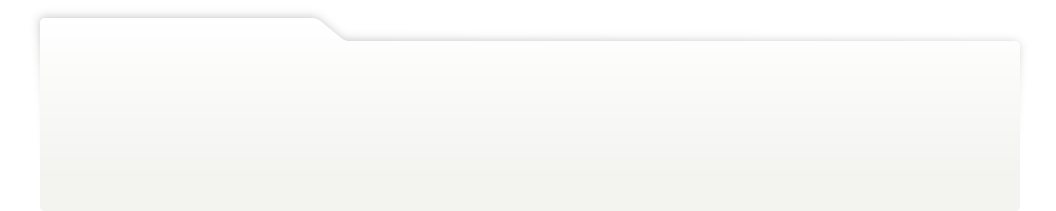
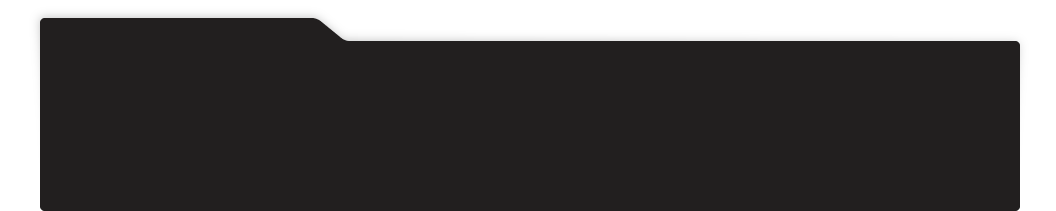
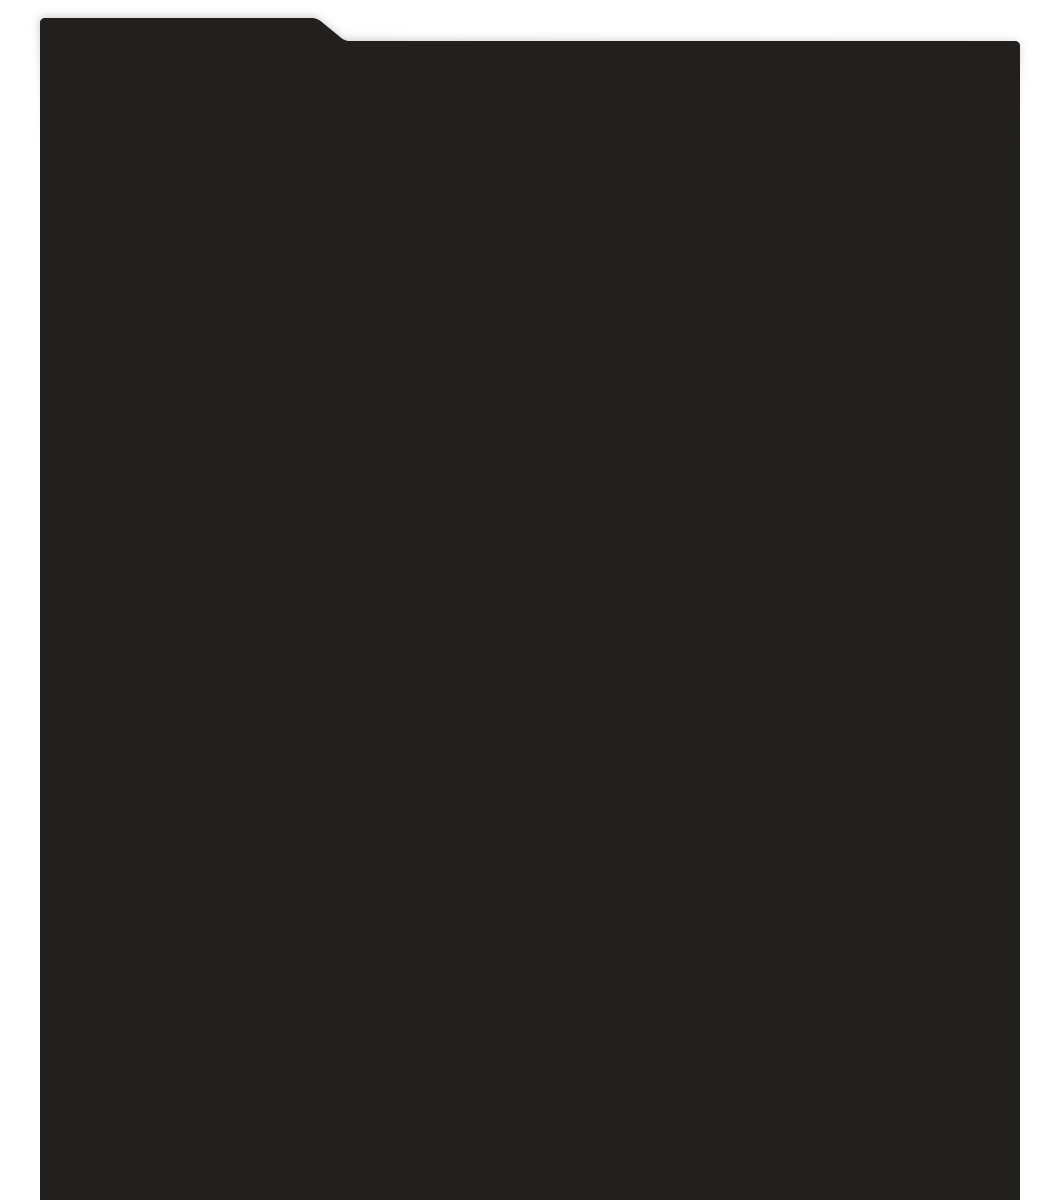
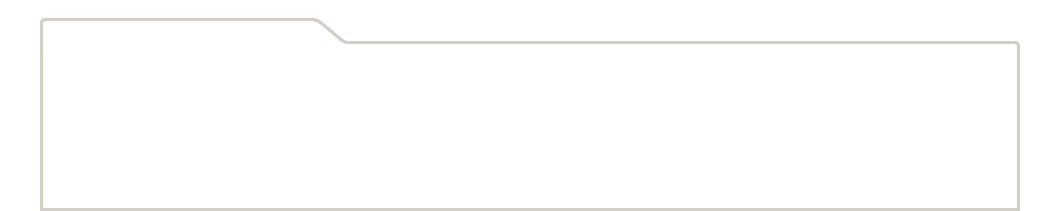
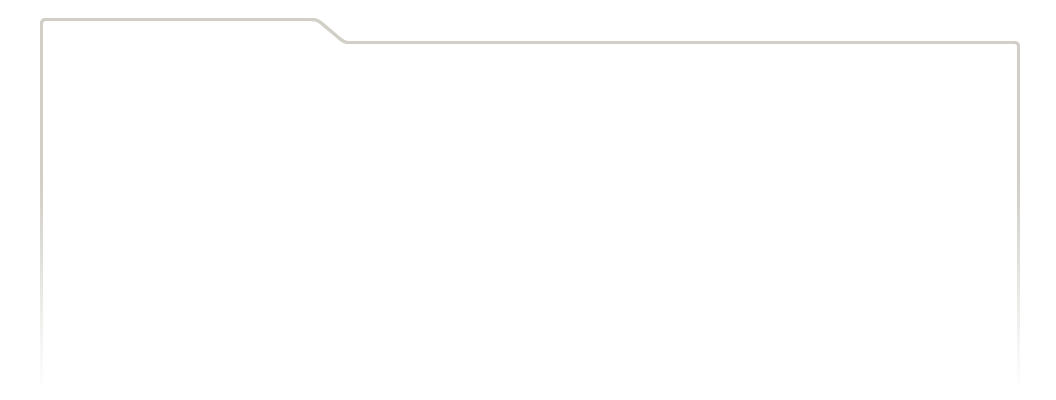
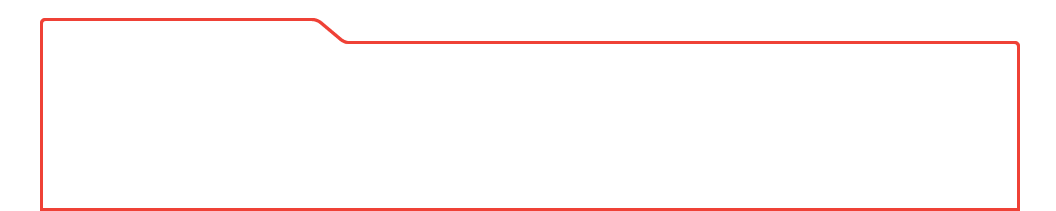
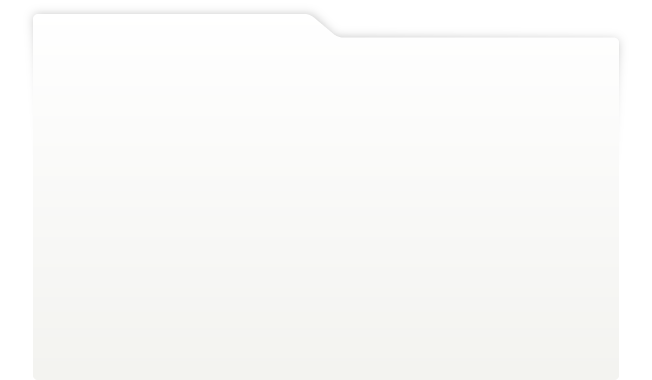
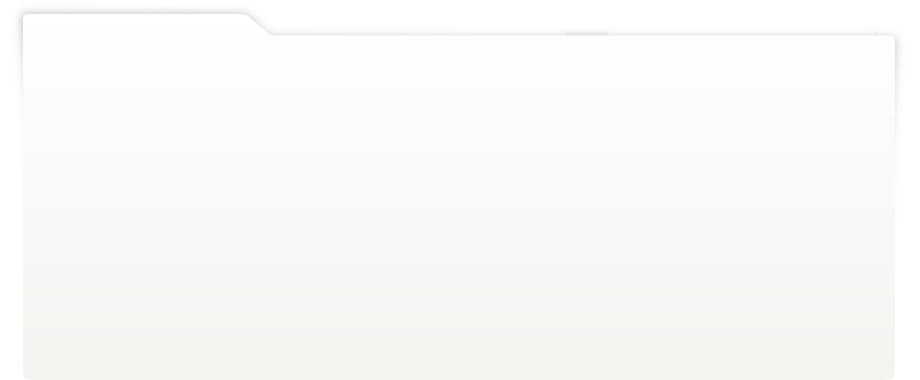
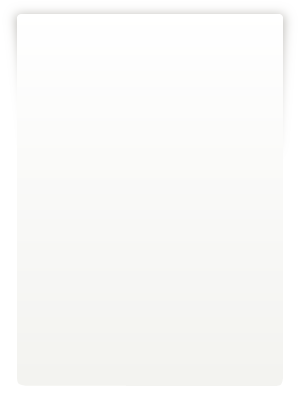
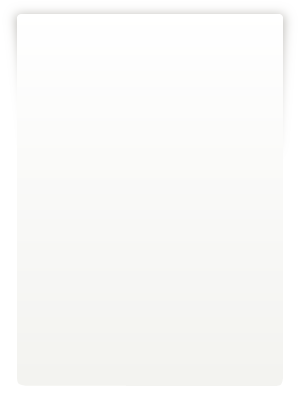
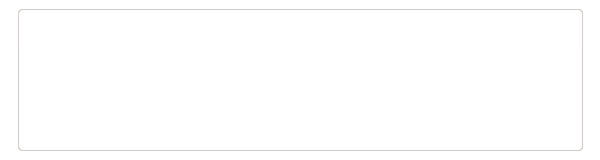
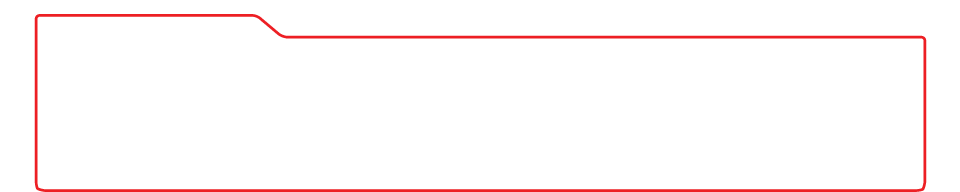
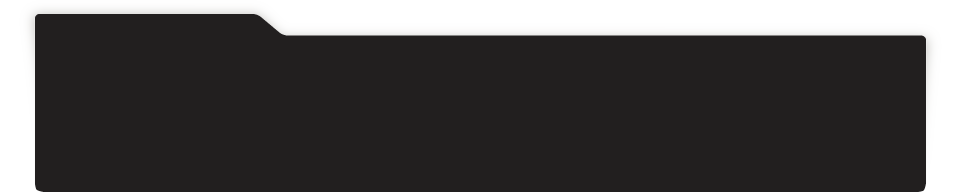
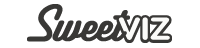
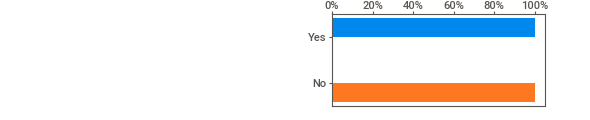
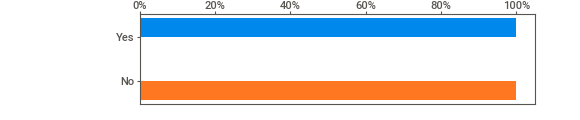
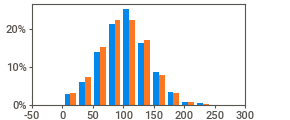
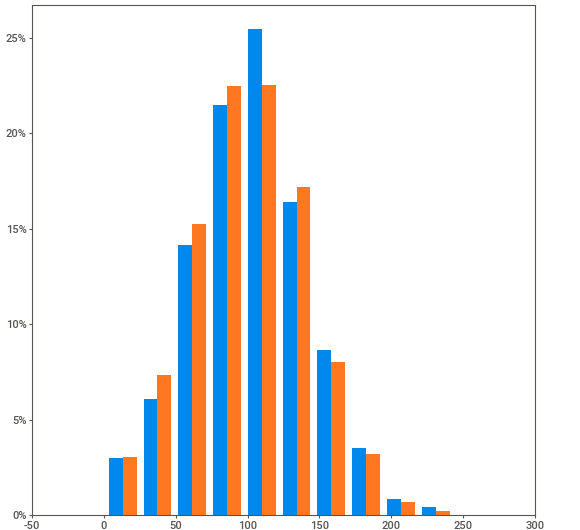
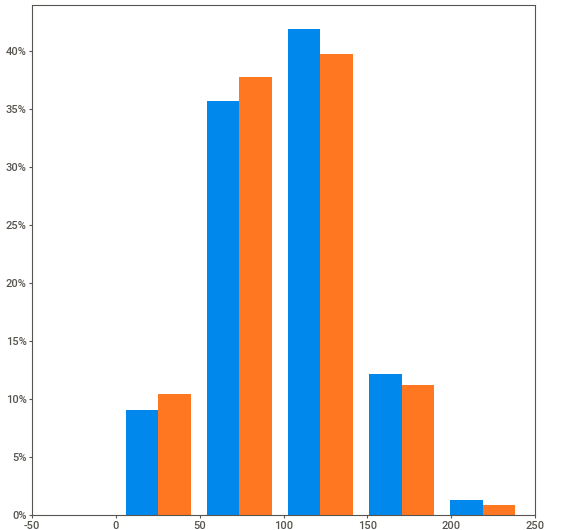
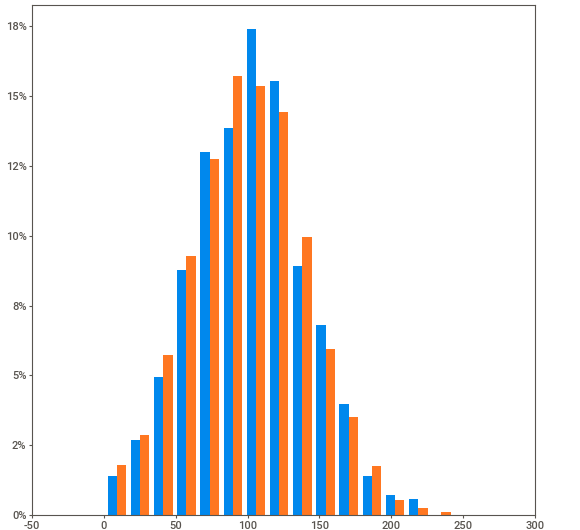
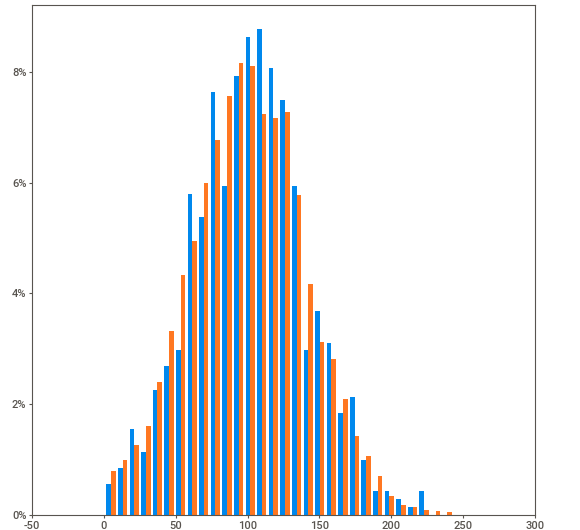
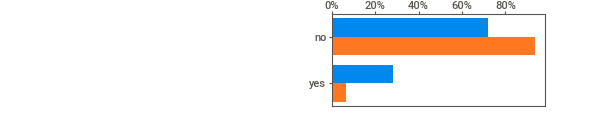
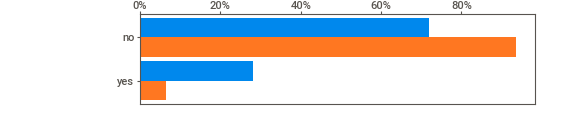
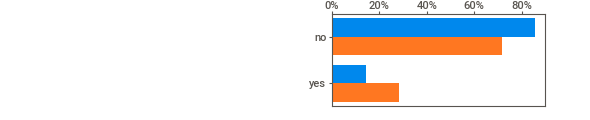
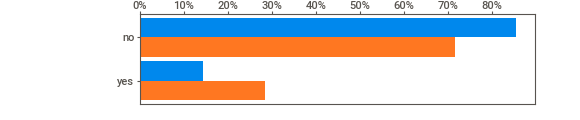
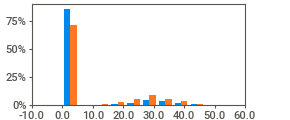
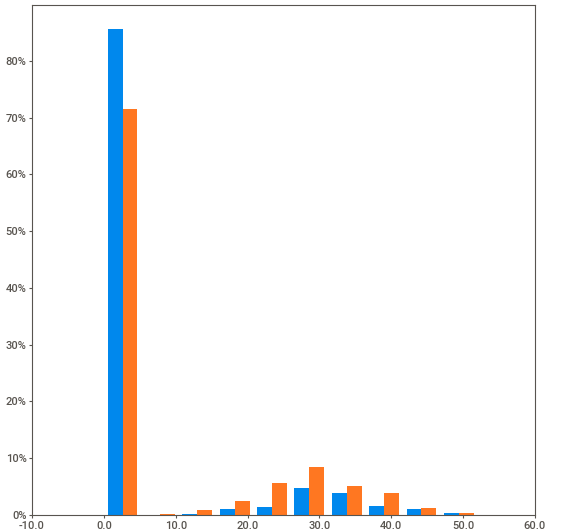
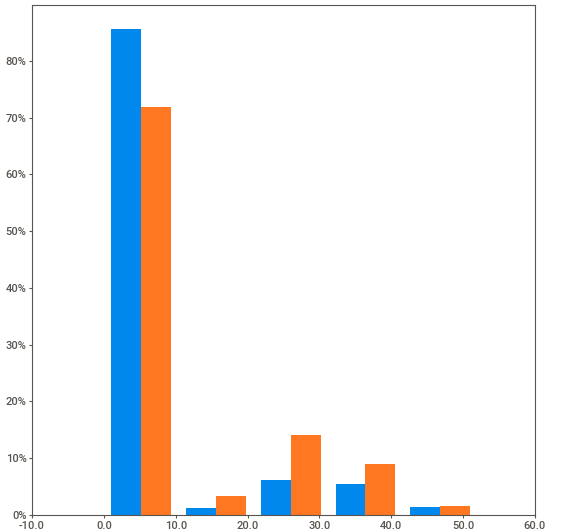
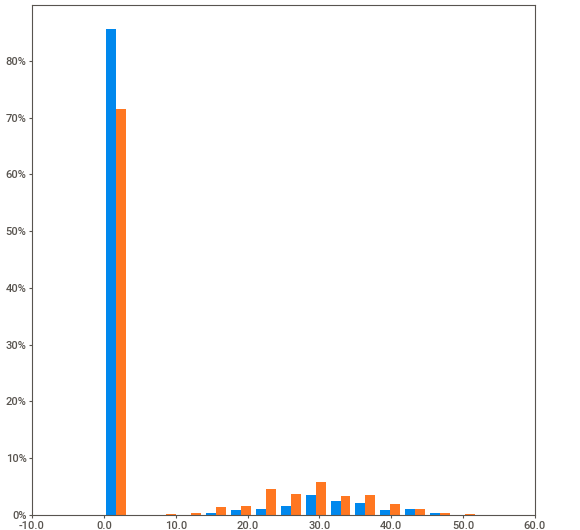
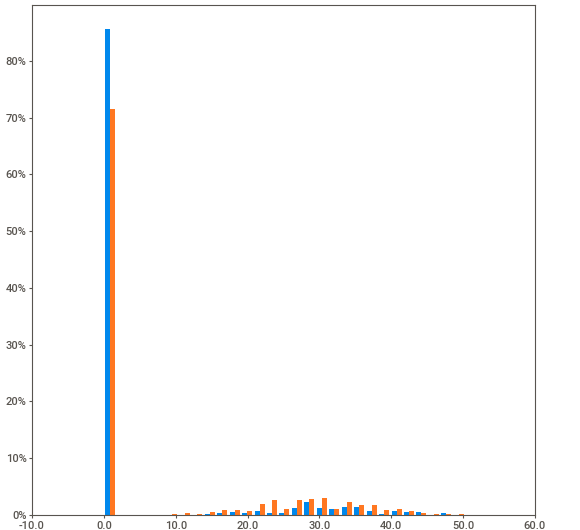
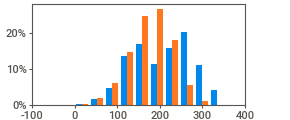
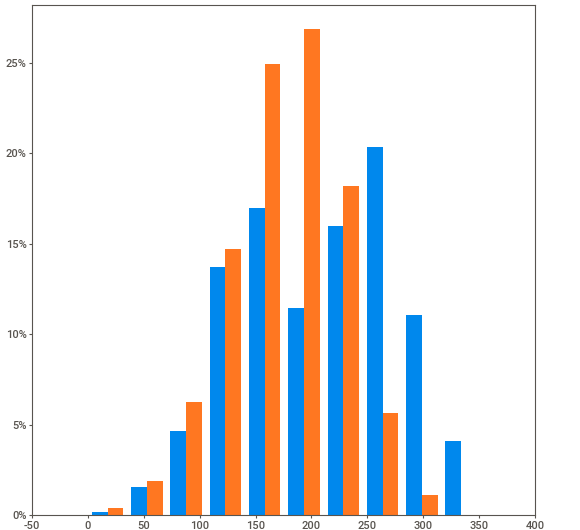
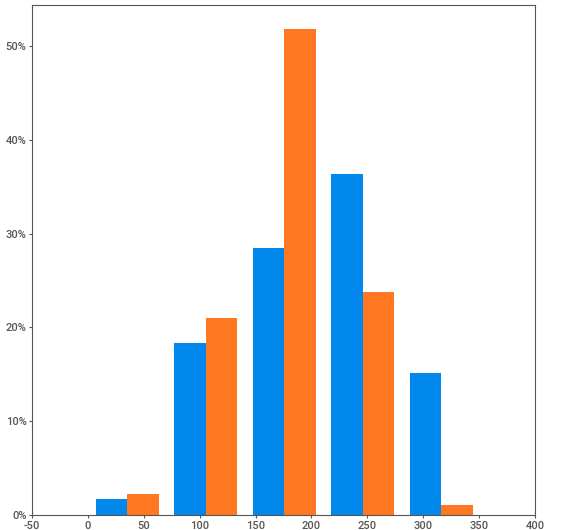
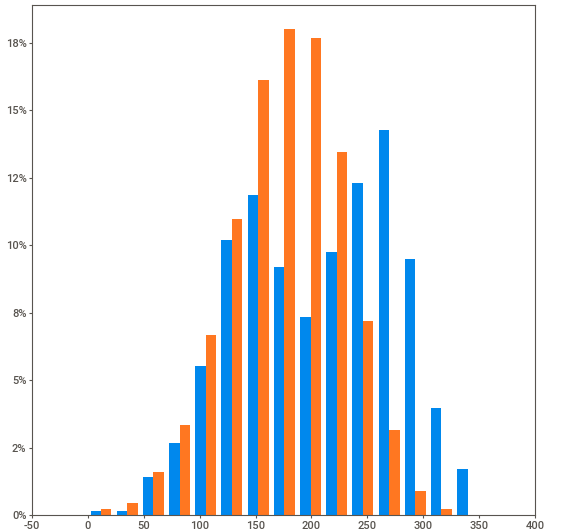
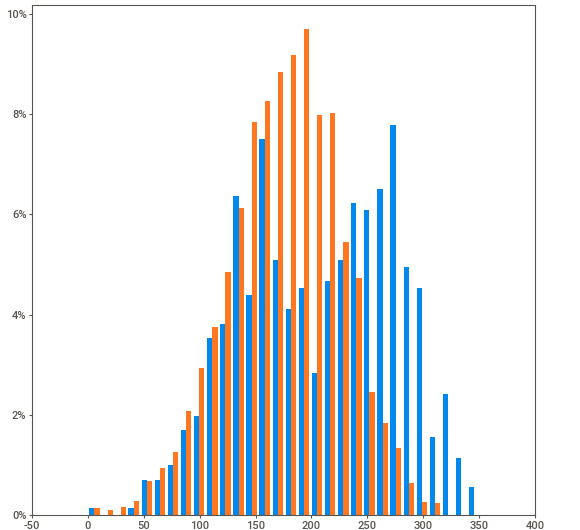
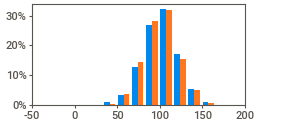
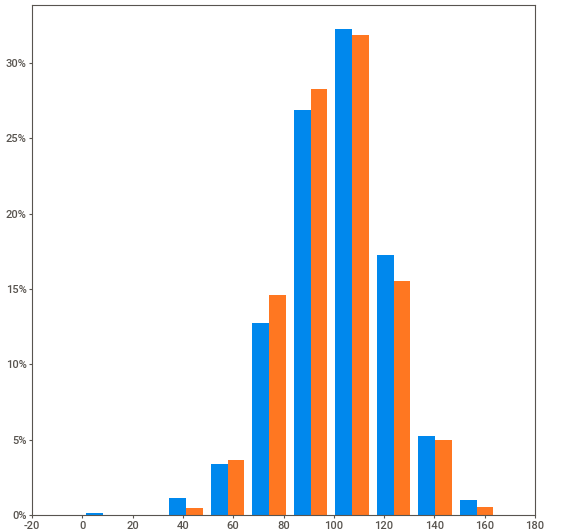
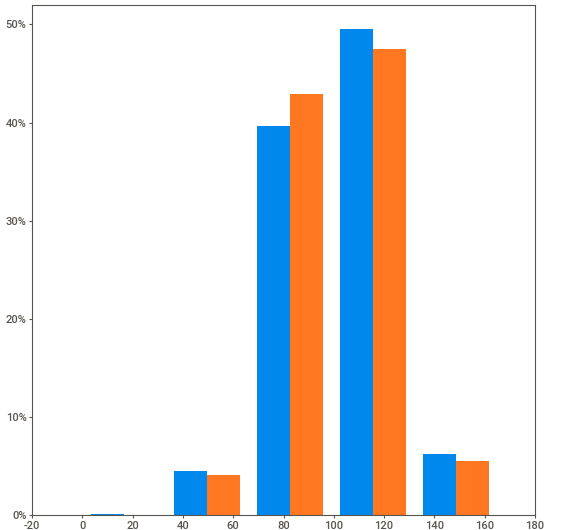
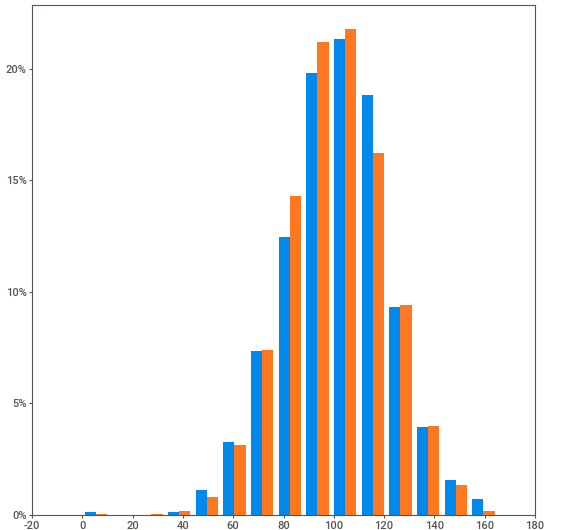
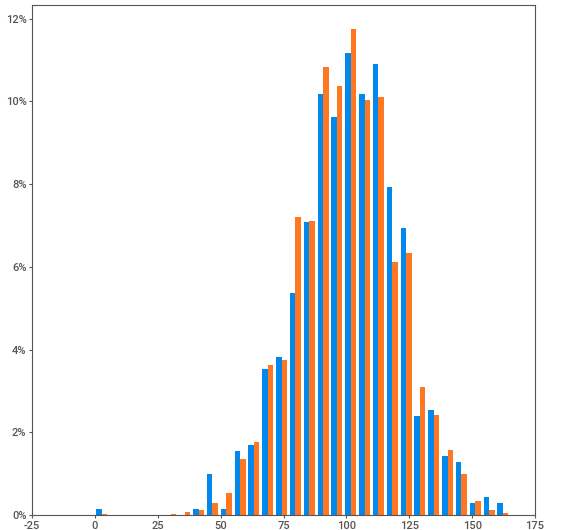
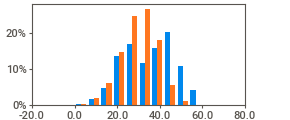
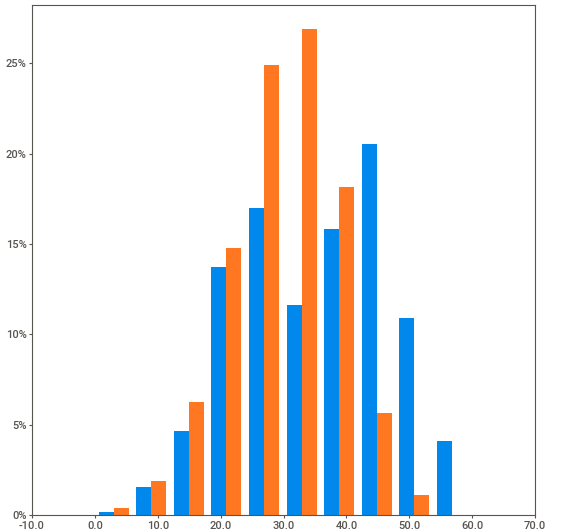
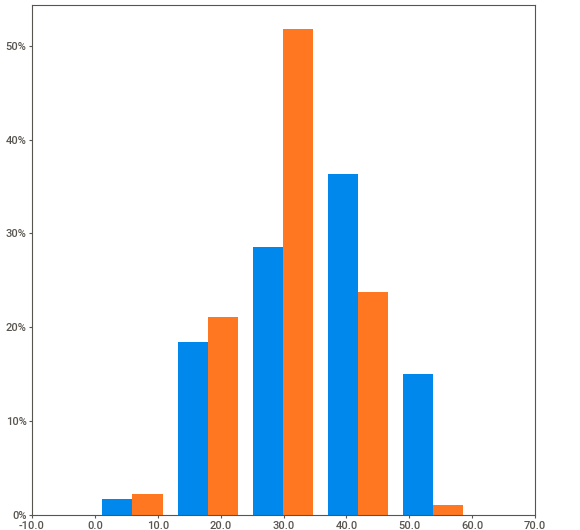
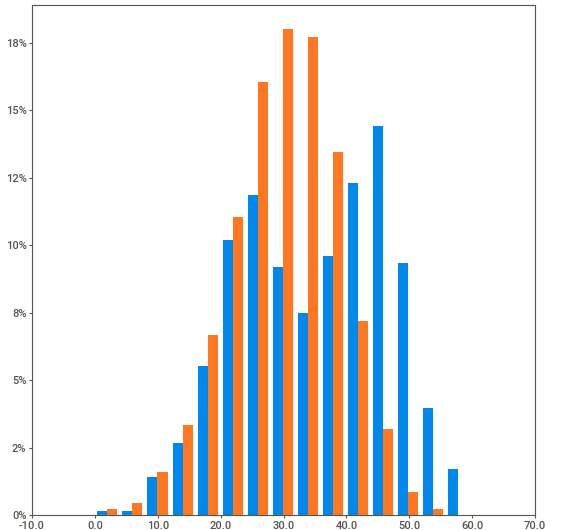
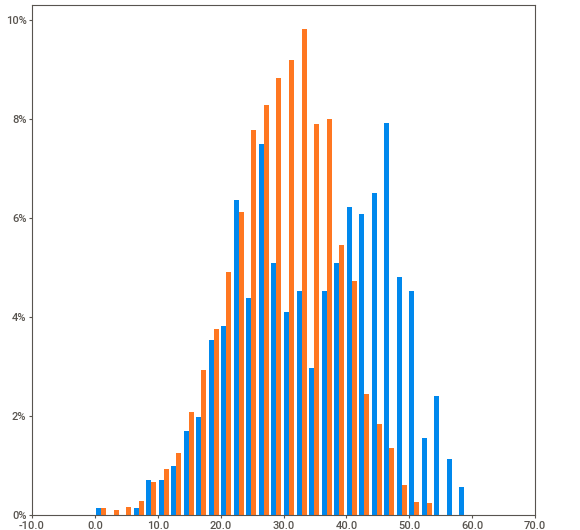
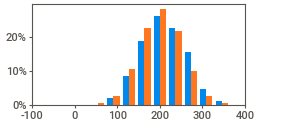
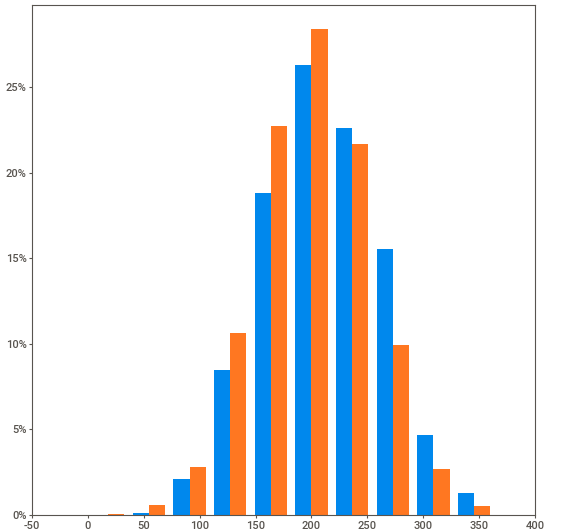
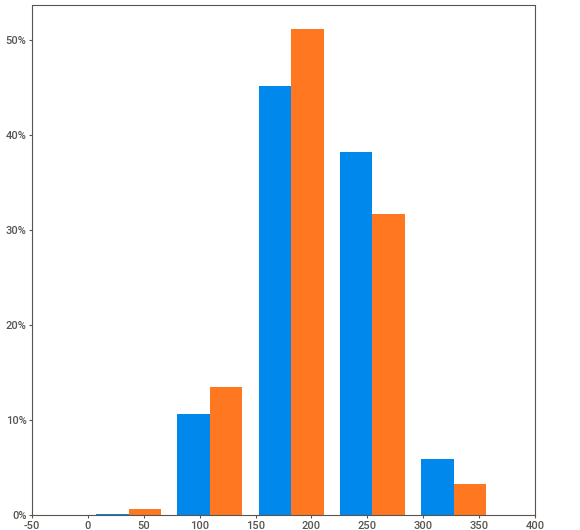
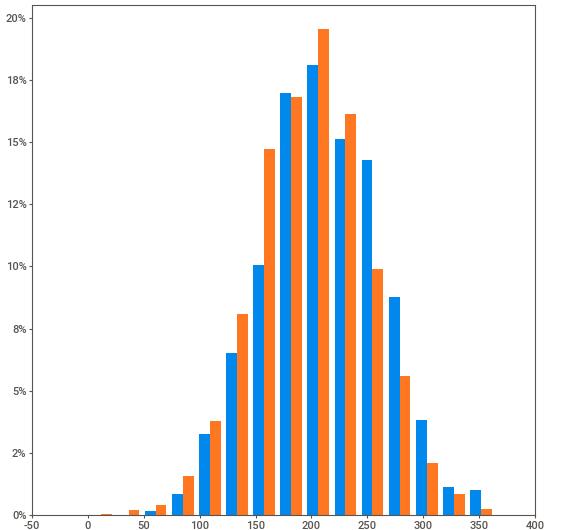
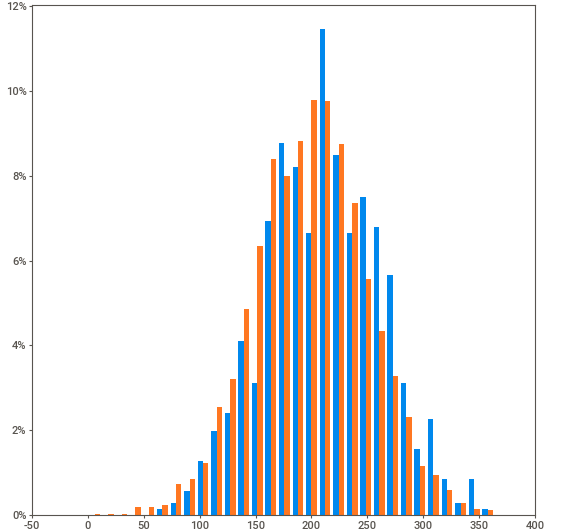
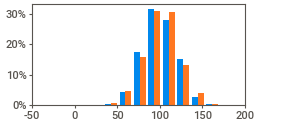
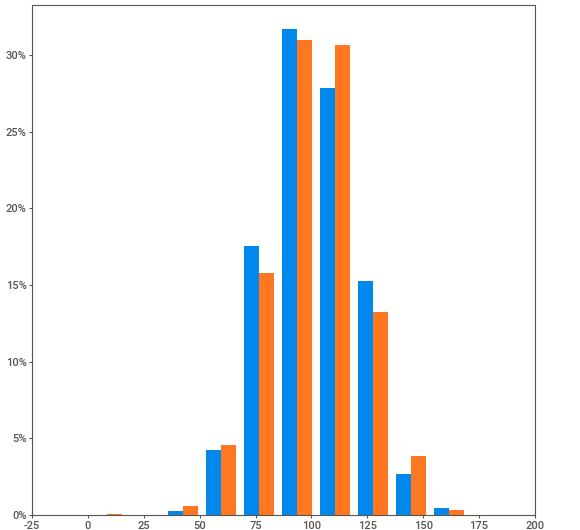
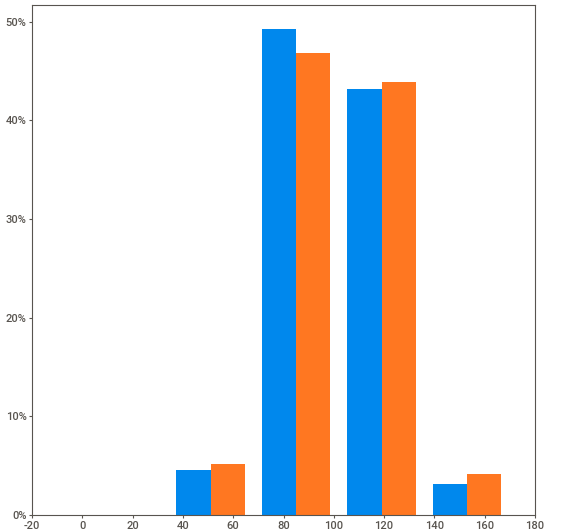
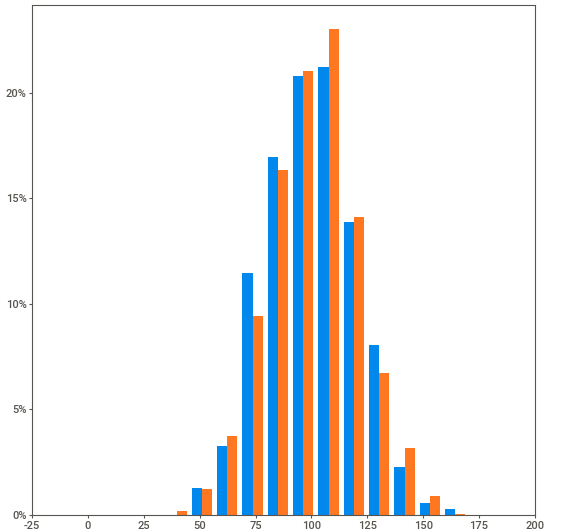
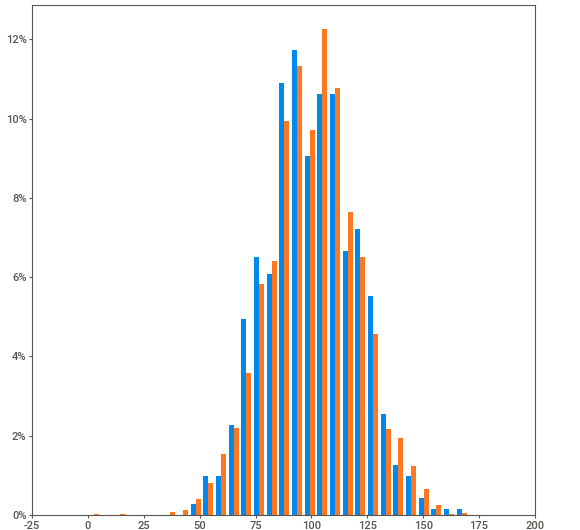
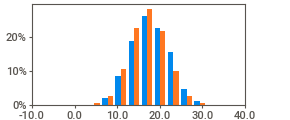
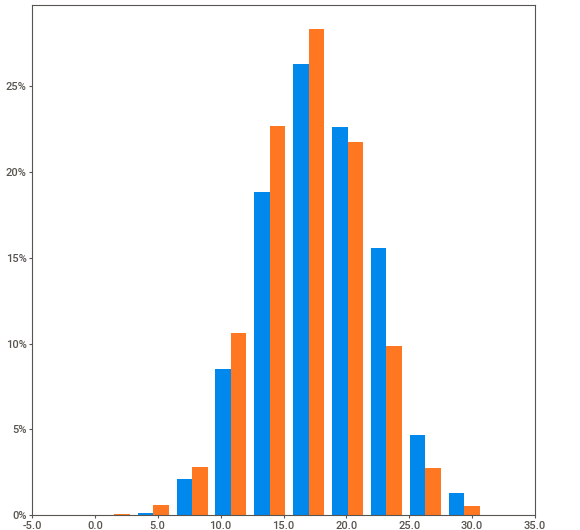
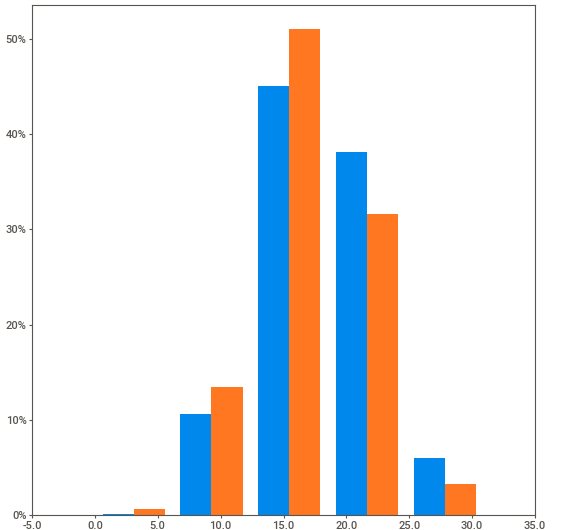
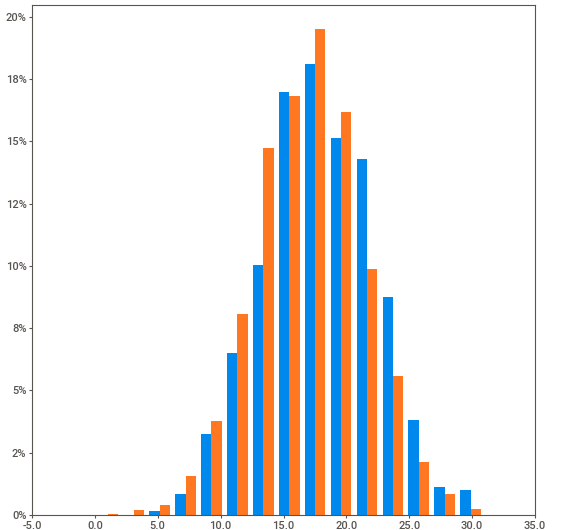
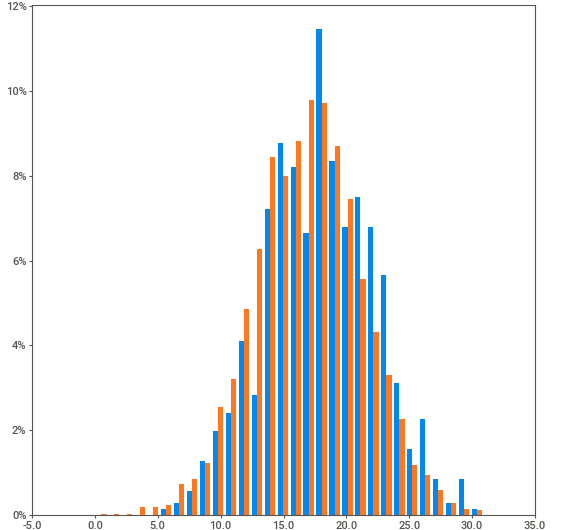
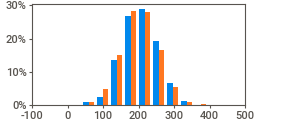
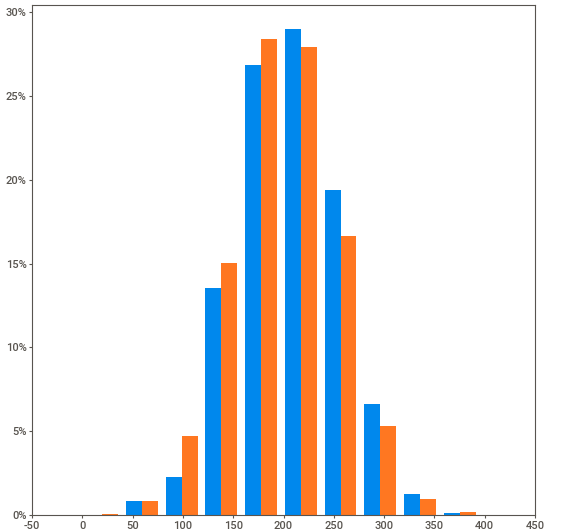
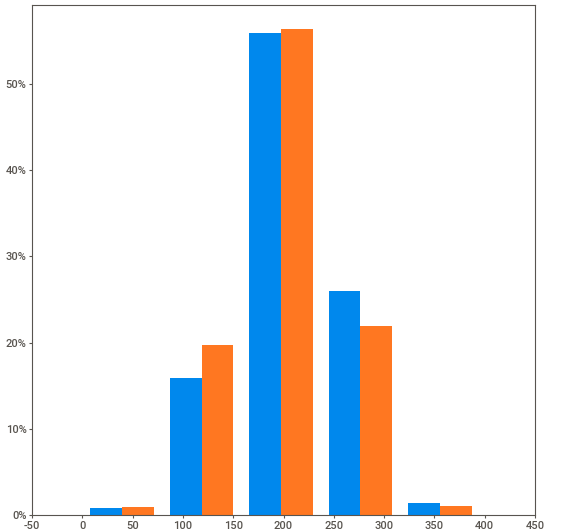
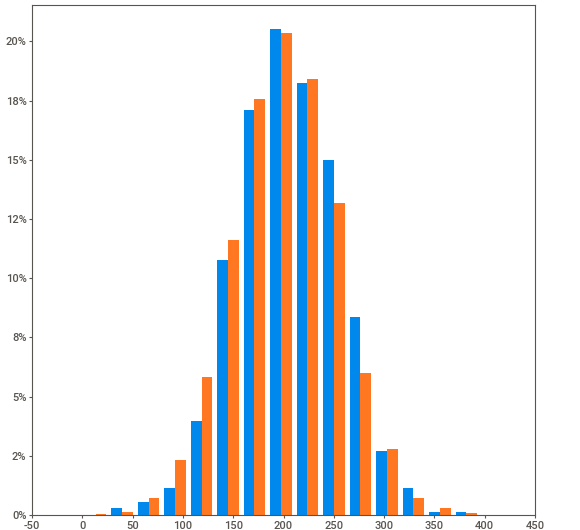
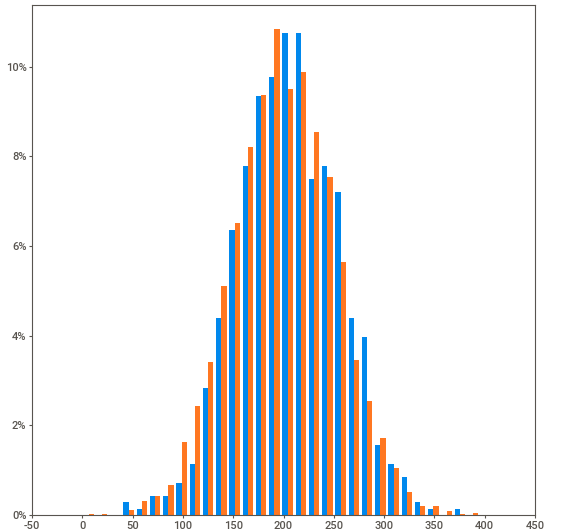
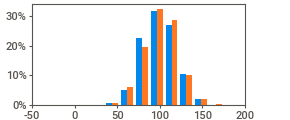
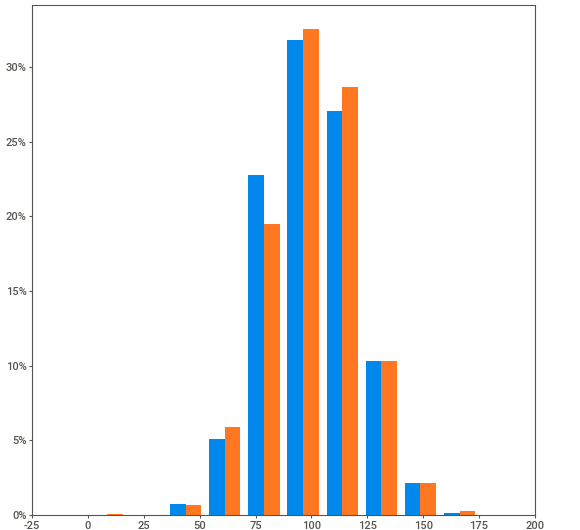
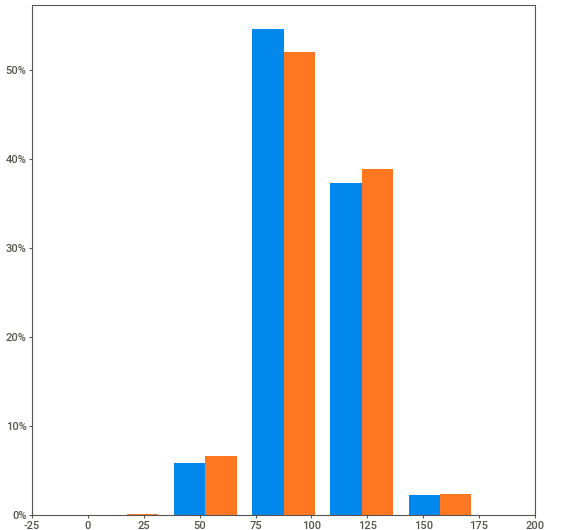
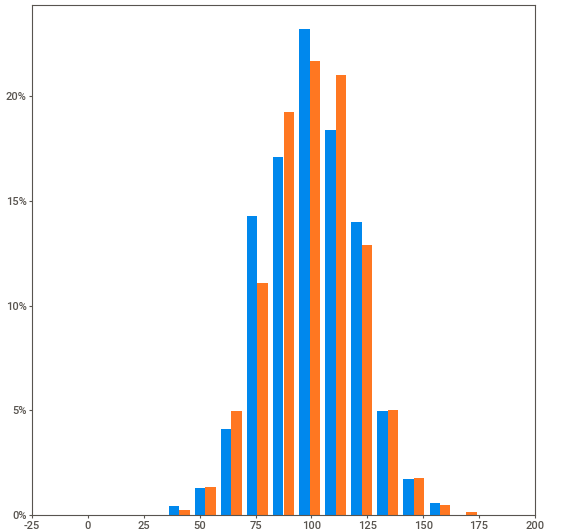
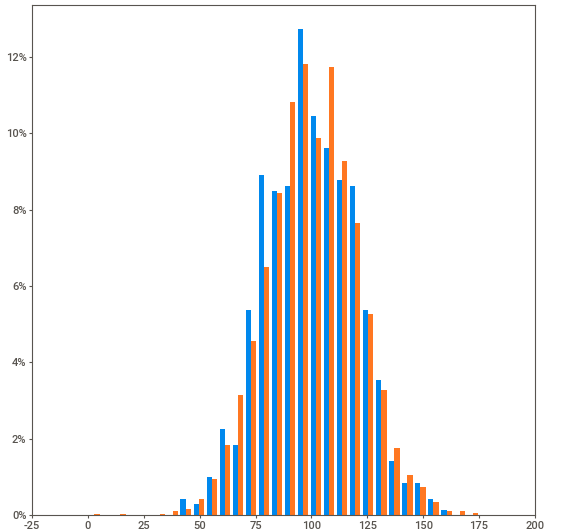
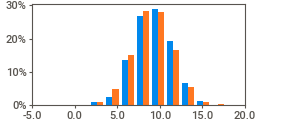
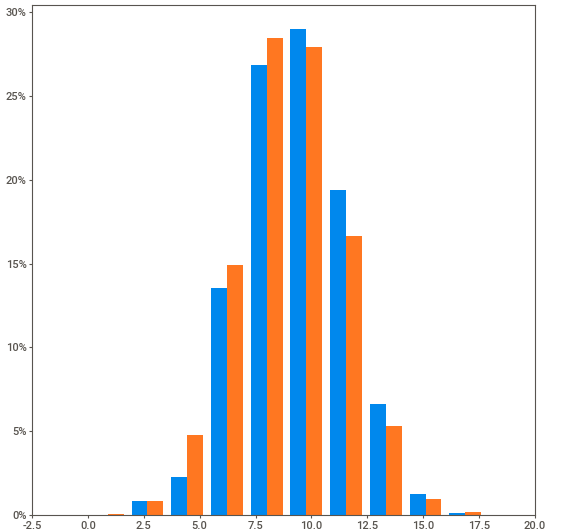
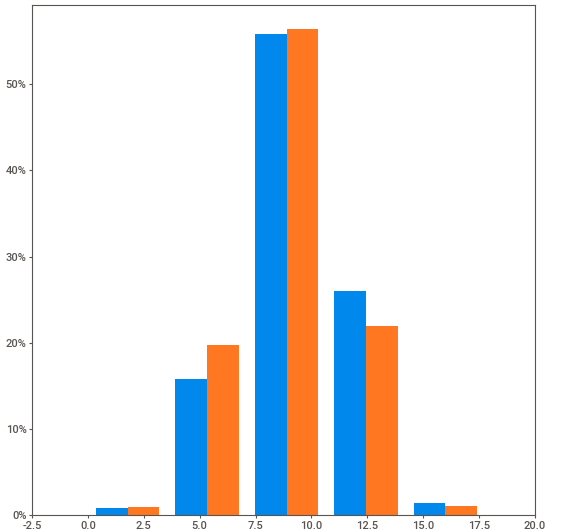
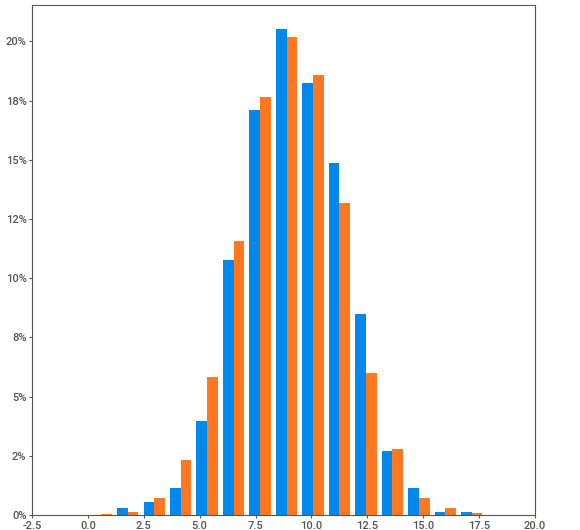
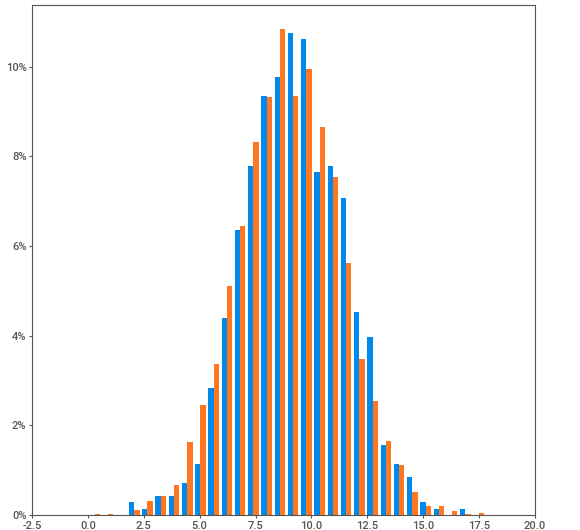
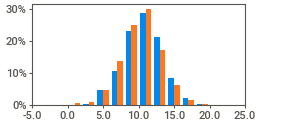
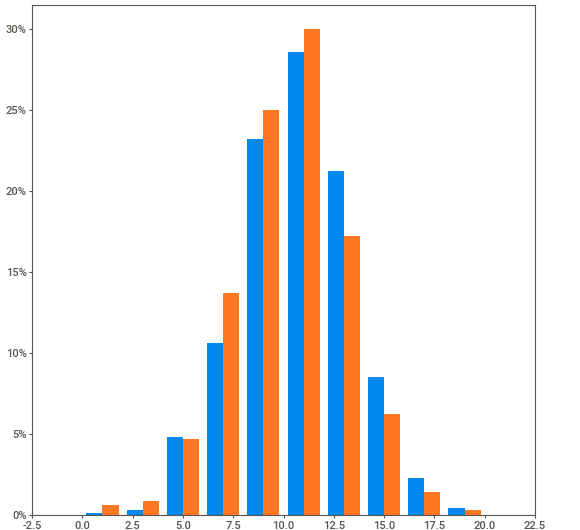
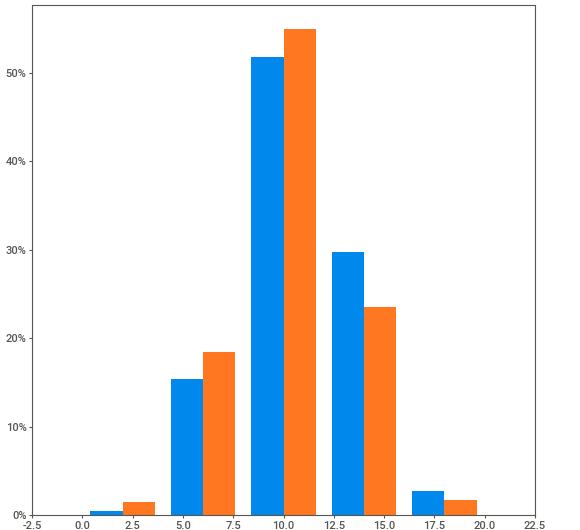
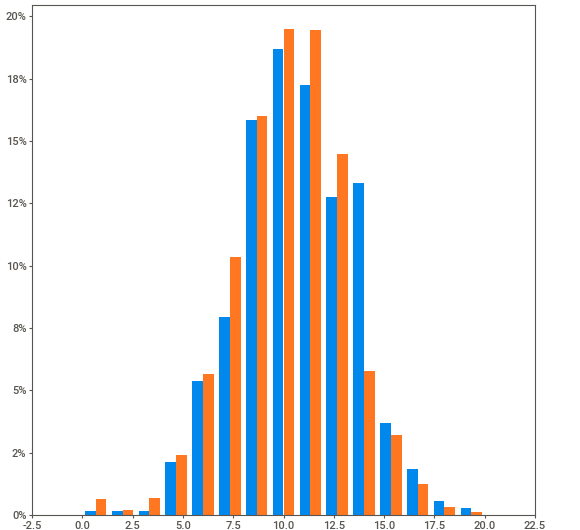
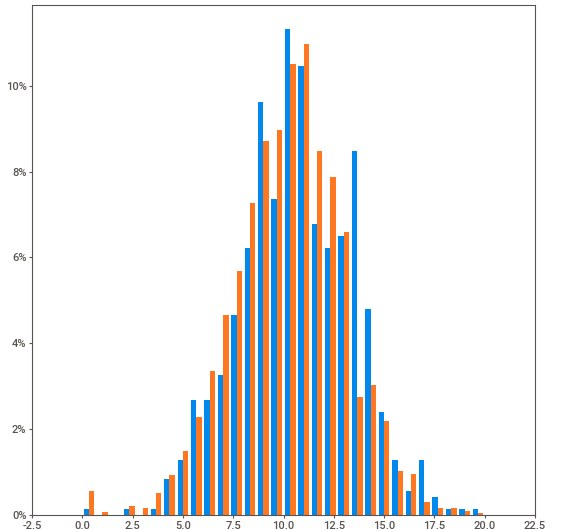
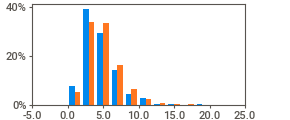
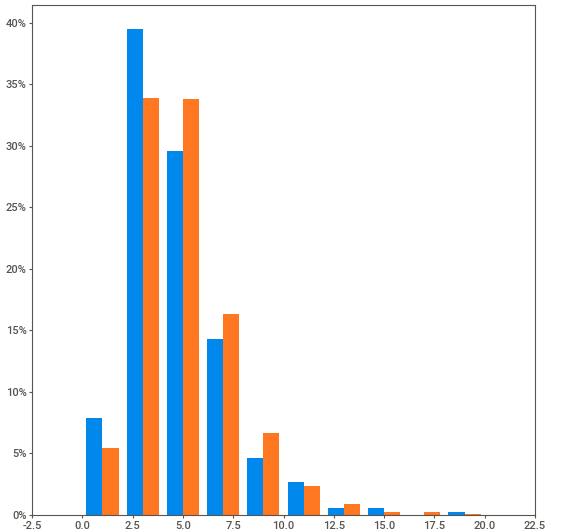
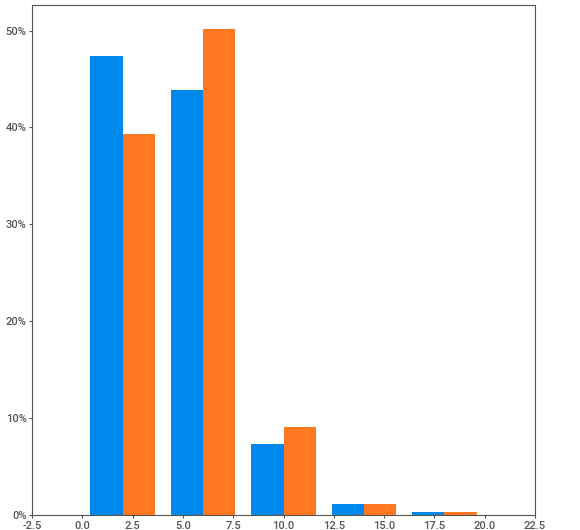
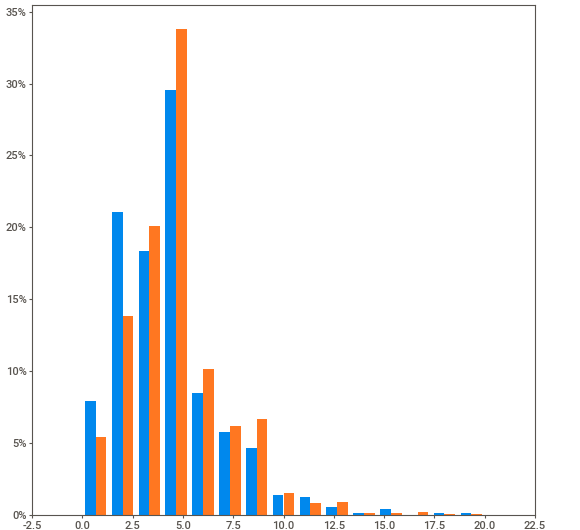
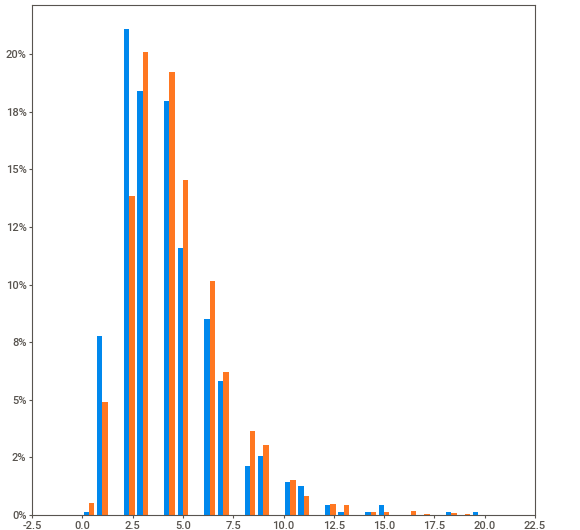
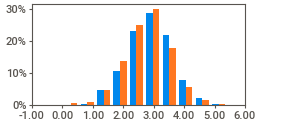
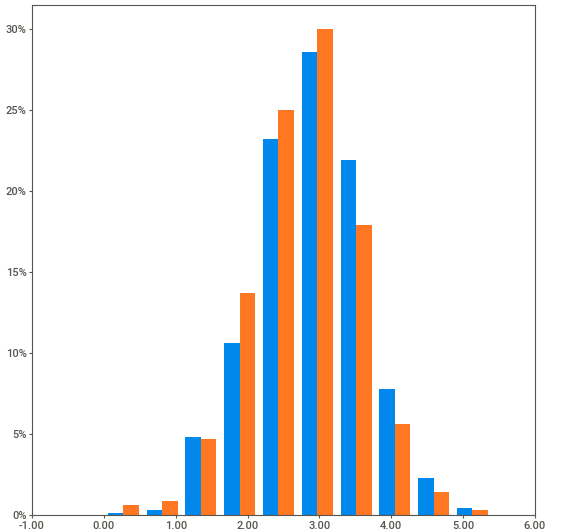
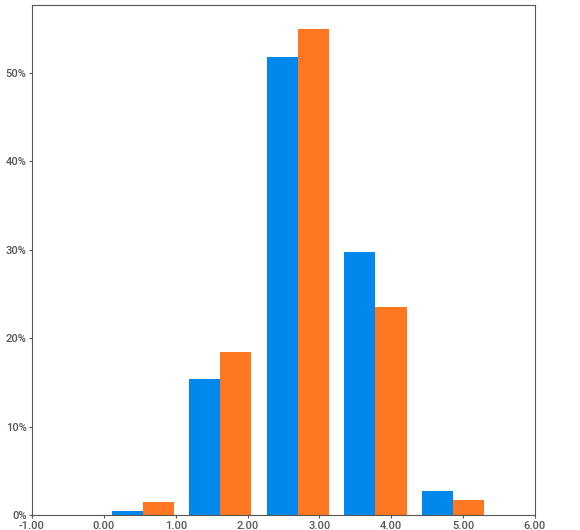
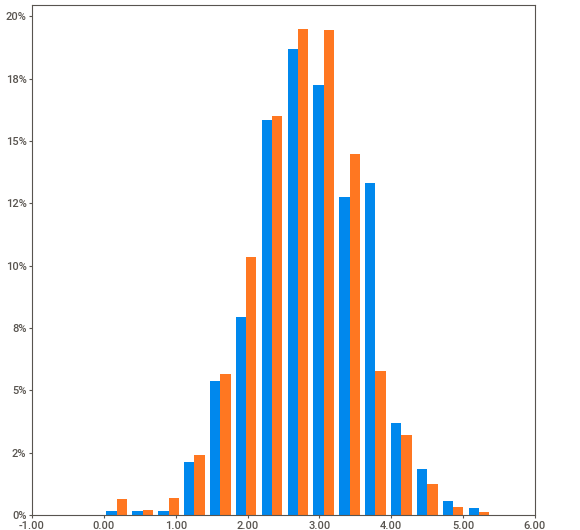
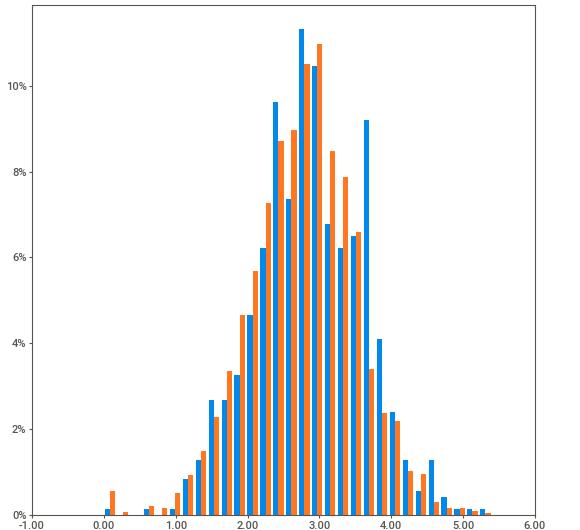
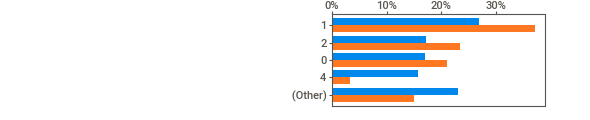
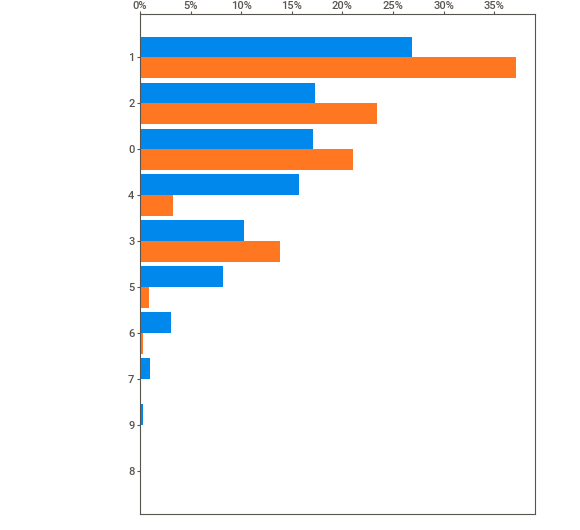
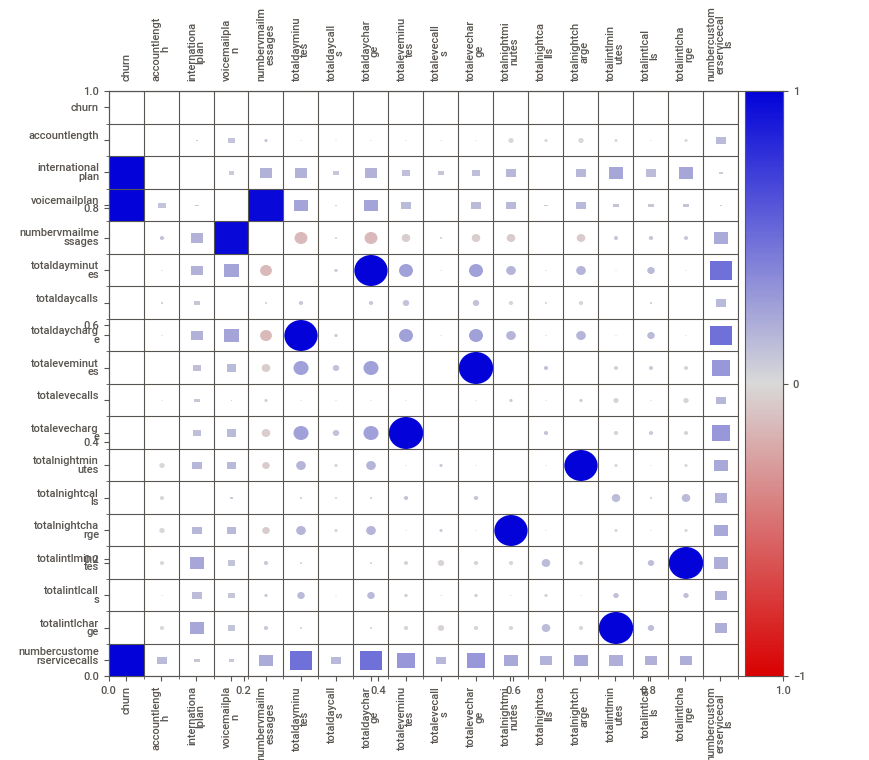
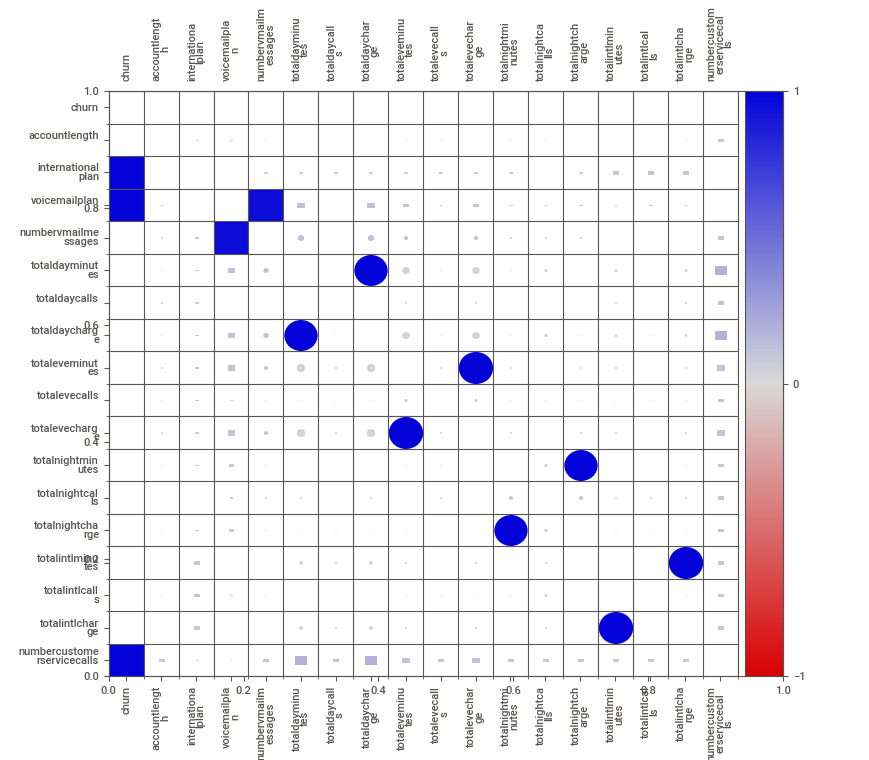

In [5]:
# Generating the report
report.show_notebook()

In [6]:
# # HTML format
# report.show_html('comparison_report.html')

In [7]:
# Getting a summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   churn                       5000 non-null   object 
 1   accountlength               5000 non-null   int64  
 2   internationalplan           5000 non-null   object 
 3   voicemailplan               5000 non-null   object 
 4   numbervmailmessages         5000 non-null   int64  
 5   totaldayminutes             5000 non-null   float64
 6   totaldaycalls               5000 non-null   int64  
 7   totaldaycharge              5000 non-null   float64
 8   totaleveminutes             5000 non-null   float64
 9   totalevecalls               5000 non-null   int64  
 10  totalevecharge              5000 non-null   float64
 11  totalnightminutes           5000 non-null   float64
 12  totalnightcalls             5000 non-null   int64  
 13  totalnightcharge            5000 

In [8]:
# Descriptive statistics of the dataframe
df.describe()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.25860,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400
std,39.69456,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.00000,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,100.00000,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.00000,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.00000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
from autogluon.tabular import TabularDataset, TabularPredictor

df = TabularDataset(df)

from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

automl = TabularPredictor(label='churn', problem_type='binary', eval_metric='roc_auc')
automl.fit(train, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240120_150538"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240120_150538/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20240120_150538/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.

In [10]:
# Make Predictions
prediction = automl.predict(test)

In [11]:
# Evaluate Model
performance = automl.evaluate(test)

In [12]:
performance

{'roc_auc': 0.9196433793731567,
 'accuracy': 0.96,
 'balanced_accuracy': 0.8742135211691273,
 'mcc': 0.8242255578033836,
 'f1': 0.84,
 'precision': 0.9459459459459459,
 'recall': 0.7553956834532374}

In [13]:
leaderboard = automl.leaderboard(test, silent=True)

In [14]:
leaderboard

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost_r49_BAG_L1,0.934057,0.926291,roc_auc,0.193418,0.087505,2.445888,0.193418,0.087505,2.445888,1,True,70
1,XGBoost_r95_BAG_L1,0.933648,0.929925,roc_auc,0.220831,0.059395,1.803981,0.220831,0.059395,1.803981,1,True,106
2,LightGBM_r121_BAG_L1,0.933572,0.922136,roc_auc,0.395485,0.311842,8.035288,0.395485,0.311842,8.035288,1,True,87
3,LightGBM_r161_BAG_L1,0.933322,0.922453,roc_auc,0.478677,0.347339,11.418225,0.478677,0.347339,11.418225,1,True,40
4,LightGBM_r131_BAG_L1,0.932779,0.923347,roc_auc,0.189477,0.209088,3.635060,0.189477,0.209088,3.635060,1,True,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,NeuralNetFastAI_r100_BAG_L1,0.900233,0.912748,roc_auc,0.222204,0.258275,16.302547,0.222204,0.258275,16.302547,1,True,101
107,NeuralNetFastAI_r156_BAG_L1,0.894100,0.899212,roc_auc,0.110292,0.112957,6.669799,0.110292,0.112957,6.669799,1,True,43
108,NeuralNetFastAI_r65_BAG_L1,0.892437,0.894500,roc_auc,0.136328,0.084361,6.617330,0.136328,0.084361,6.617330,1,True,67
109,KNeighborsDist_BAG_L1,0.703595,0.673509,roc_auc,0.028673,0.072056,0.007718,0.028673,0.072056,0.007718,1,True,2


In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'predictions' are the predictions made by your model on the test set
# and 'test_data' is your test dataset
y_true = test['churn']
y_pred = prediction

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

cm

array([[855,   6],
       [ 34, 105]])